# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
import matplotlib
import matplotlib.pyplot as plt
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
matplotlib.rc("font",family='SimHei') # 中文字体

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-28 16:02:31--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.3MB/s    用时 0.5s    

2022-08-28 16:02:31 (21.3 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



## 导入工具包

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [3]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


## 载入测试集预测结果表格

In [4]:
df = pd.read_csv('测试集预测结果.csv')

In [5]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
0,fruit30_split/val/哈密瓜/106.jpg,0,哈密瓜,4,柚子,5,柠檬,7,梨,False,...,1.815084e-07,0.000001,3.243423e-06,0.000011,0.000006,0.000116,1.286697e-04,4.142584e-07,0.000005,6.217669e-07
1,fruit30_split/val/哈密瓜/109.jpg,0,哈密瓜,6,桂圆,0,哈密瓜,8,椰子,True,...,7.804896e-08,0.000001,9.750311e-07,0.001511,0.000043,0.000157,6.638699e-07,3.048453e-06,0.000032,2.386899e-06
2,fruit30_split/val/哈密瓜/114.jpg,0,哈密瓜,0,哈密瓜,26,西红柿,23,葡萄-白,True,...,9.334810e-03,0.007176,1.038816e-03,0.037528,0.034992,0.001578,2.654020e-01,1.620361e-04,0.005669,1.115545e-03
3,fruit30_split/val/哈密瓜/116.jpg,0,哈密瓜,0,哈密瓜,16,芒果,4,柚子,True,...,3.197652e-05,0.000254,6.003276e-05,0.001584,0.000003,0.000280,7.256652e-04,2.260151e-07,0.021936,3.845498e-04
4,fruit30_split/val/哈密瓜/118.png,0,哈密瓜,4,柚子,11,猕猴桃,23,葡萄-白,False,...,7.075434e-04,0.000068,7.408392e-05,0.115253,0.000762,0.000400,2.893470e-03,2.952121e-08,0.000335,4.361433e-04


## 绘制某一类别的ROC曲线

In [6]:
specific_class = '荔枝'

In [7]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [8]:
y_test

0       False
1       False
2       False
3       False
4       False
        ...  
1073    False
1074    False
1075    False
1076    False
1077    False
Name: 标注类别名称, Length: 1078, dtype: bool

In [9]:
# 二分类置信度
y_score = df['荔枝-预测置信度']

In [10]:
y_score

0       1.234387e-06
1       1.349890e-06
2       7.176440e-03
3       2.536595e-04
4       6.795795e-05
            ...     
1073    2.788913e-10
1074    3.748588e-09
1075    6.892094e-04
1076    2.416200e-06
1077    5.240494e-08
Name: 荔枝-预测置信度, Length: 1078, dtype: float64

In [11]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

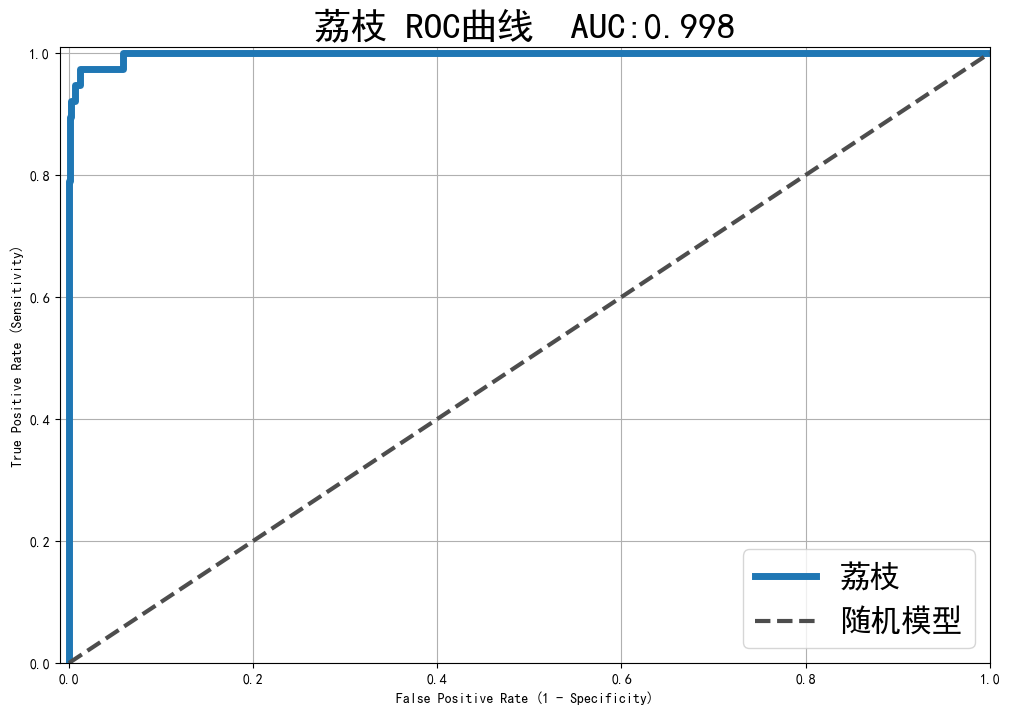

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

plt.savefig('{}-ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

# yticks = ax.yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)

In [13]:
auc(fpr, tpr)

0.9978238866396761

## 绘制所有类别的ROC曲线

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [15]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [16]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

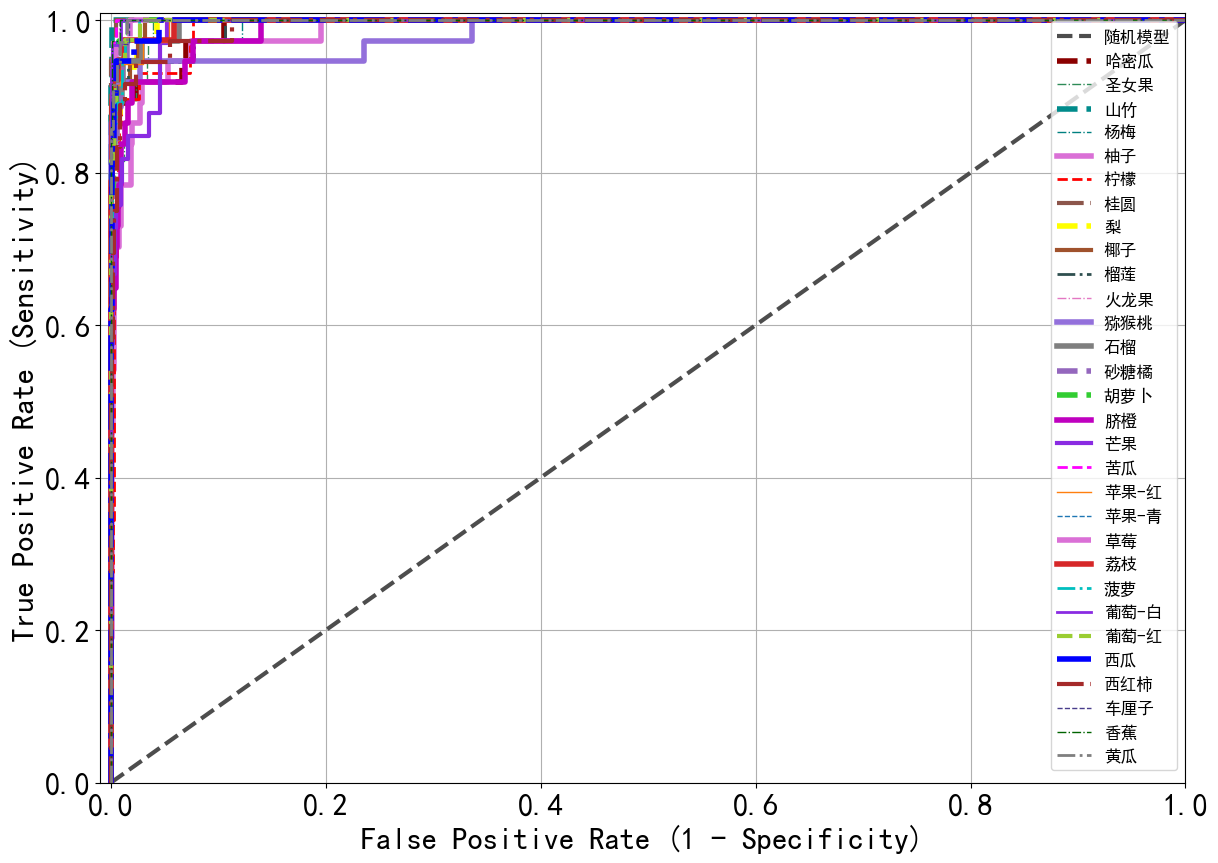

In [17]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别ROC曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [18]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [19]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,哈密瓜,0.882353,0.810811,0.845070,37.0,0.810811,0.922526
1,圣女果,0.923077,0.631579,0.750000,38.0,0.631579,0.891536
2,山竹,1.000000,0.828571,0.906250,35.0,0.828571,0.997550
3,杨梅,0.861111,0.837838,0.849315,37.0,0.837838,0.959707
4,柚子,0.736842,0.756757,0.746667,37.0,0.756757,0.817784
5,柠檬,0.800000,0.827586,0.813559,29.0,0.827586,0.808678
6,桂圆,0.760000,1.000000,0.863636,38.0,1.000000,0.993807
7,梨,0.828571,0.783784,0.805556,37.0,0.783784,0.919617
8,椰子,0.918919,0.894737,0.906667,38.0,0.894737,0.953605
9,榴莲,0.935484,0.805556,0.865672,36.0,0.805556,0.939305


In [20]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [21]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [22]:
df_report['AUC'] = auc_list

In [23]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,哈密瓜,0.882353,0.810811,0.845070,37.0,0.810811,0.922526,0.992523
1,圣女果,0.923077,0.631579,0.750000,38.0,0.631579,0.891536,0.994534
2,山竹,1.000000,0.828571,0.906250,35.0,0.828571,0.997550,0.999918
3,杨梅,0.861111,0.837838,0.849315,37.0,0.837838,0.959707,0.996002
4,柚子,0.736842,0.756757,0.746667,37.0,0.756757,0.817784,0.986655
5,柠檬,0.800000,0.827586,0.813559,29.0,0.827586,0.808678,0.991322
6,桂圆,0.760000,1.000000,0.863636,38.0,1.000000,0.993807,0.999747
7,梨,0.828571,0.783784,0.805556,37.0,0.783784,0.919617,0.996158
8,椰子,0.918919,0.894737,0.906667,38.0,0.894737,0.953605,0.997571
9,榴莲,0.935484,0.805556,0.865672,36.0,0.805556,0.939305,0.994135


In [24]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)